In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tqdm
from ipywidgets import interact
from utils import *  # Local file

seaborn.set(style="ticks", palette="Set2")

# Analytical solution
We have
$$
 u''(x) = f(x) = cos(2\pi x) + x
$$
where
$$
P_1u(0) = \alpha, P_2 u(1) = \sigma, 
$$
and $P_1, P_2$ are either $\partial_x$ or $\mathbb{1}$.
The latter corresponds to a Dirichlet boundary condition, while the former is a Neumann condition.

$$
\newcommand{\Bold}[1]{\mathbf{#1}}K_{2} x + K_{1} + \frac{2 \, \pi^{2} x^{3} - 3 \, \cos\left(2 \, \pi x\right)}{12 \, \pi^{2}}
$$
where the following holds
\begin{align}
a(0) &= K_{1} - \frac{1}{4 \, \pi^{2}} \\
a(1) &= K_{1} + K_{2} + \frac{2 \, \pi^{2} - 3}{12 \, \pi^{2}} \\
a'(0) &= K2\\
a'(1) &= K2 + \frac12.
\end{align}
In our code, we formulate a set of linear equations for $K1, K2$ from the BCs.

# Let's build some machinery!

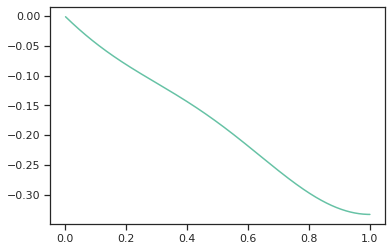

In [8]:
M = 500
A, F, x = generate_problem(f, M, (BCType.VALUE, 0), (BCType.NEUMANN, 0))
U = np.linalg.solve(A, F)
plt.plot(x, U)
plt.show()

In [ ]:
M_list = np.geomspace(10, 500, 10, dtype=int)
L2_discrete_errors = []
L2_continous_errors = []
L2_continous_errors_inter = []

BCs = [(BCType.VALUE, 0), (BCType.NEUMANN, 0)]

for M in M_list:
    A, F, x = generate_problem(f, M, *BCs)
    U = np.linalg.solve(A, F)
    analytical = u(*BCs)
    L2_discrete_errors.append(L2_discrete_error(U, analytical(x)))
    L2_continous_errors.append(L2_continous_error(step_continuation(U), analytical))
    L2_continous_errors_inter.append(
        L2_continous_error(interpolation_continuation(U), analytical)
    )

In [ ]:
plt.plot(M_list, L2_discrete_errors, "o-", label="Discrete")
plt.plot(M_list, L2_continous_errors, "x-", label="Continous")
plt.plot(M_list, L2_continous_errors_inter, "x-", label="Continous (interpolation)")
# plt.plot([1e2, 1e3, 1e3, 1e2], [10e-4, 10e-6, 10e-4, 10e-4], lw=0.5, c="gray")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
U_func = step_continuation(U)
plt.plot(x, U_func(x))
plt.plot(x, U)